<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Time_Series/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D_%EC%84%B8%EB%AF%B8%EB%82%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù ÏÑ∏ÎØ∏ÎÇò Í∞úÎÖê ÏÑ§Î™Ö

[Velog Link](https://velog.io/@namwootree/%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%B6%84%EC%84%9D-%EC%84%B8%EB%AF%B8%EB%82%98-1-%EA%B0%9C%EB%85%90-%EC%84%A4%EB%AA%85)

# Setting

In [64]:
!nvidia-smi

Thu Jul 28 08:00:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Í∏∞Î≥∏
import itertools # ÏûêÏã†ÎßåÏùò Î∞òÎ≥µÏûêÎ•º ÎßåÎìúÎäî Î™®Îìà
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import joblib # ÎîîÏä§ÌÅ¨ Ï∫êÏã±, Î≥ëÎ†¨ ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç, ÌïôÏäµÌïú Î™®Îç∏ÏùÑ Ï†ÄÏû•
from sklearn.metrics import make_scorer

In [67]:
!pip install pystan==2.19.1.1
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# ÏãúÍ≥ÑÏó¥
import prophet
from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from dateutil.relativedelta import relativedelta # ÎÇ†Ïßú Í≥ÑÏÇ∞
import statsmodels.tsa.api as tsa
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import statsmodels
import statsmodels.api as sm  
import statsmodels.graphics.tsaplots as sgt

In [69]:
# ÌöåÍ∑ÄÎ∂ÑÏÑù
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [70]:
# Deep Neural Network
from tensorflow.keras import layers, models
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
import time

In [71]:
# ÏÑ§Ï†ï
%matplotlib inline
pd.options.display.max_columns = 400
pd.options.display.float_format = '{:.5f}'.format
from tqdm.notebook import tqdm
import random

## ÏòàÏ∏° Ïò§Ï∞® ÏÑ§Ï†ïÌïòÍ∏∞

In [72]:
def mae(prediction, correct):

  prediction = np.array(prediction)
  correct = np.array(correct)

  difference = correct - prediction
  abs_val = abs(difference)

  score = abs_val.mean()

  return score

mae_score = make_scorer(mae)
mae_score

make_scorer(mae)

## Î™®Îç∏ ÏãúÍ∞ÅÌôî

In [73]:
def plot_model_graph(data_frame, store_num, idx_col, y_cols):
    df_set = data_frame[data_frame.store_id == store_num]
    
    fig, ax1 = plt.subplots(figsize=(10, 3))
    ax1.set_xlabel("{}".format(idx_col))
    ax1.set_ylabel("{}".format(y_cols[0])).set_color(color='tab:blue')
    ax1.plot(df_set.index, df_set[y_cols[0]].values, color='tab:blue')
    
    for i in range(1, len(y_cols)):
        ax2 = ax1.twinx()
        ax2.set_ylabel("{}".format(y_cols[i])).set_color(color='C{}'.format(i))
        ax2.plot(df_set.index, df_set[y_cols[i]].values, color='C{}'.format(i))
        ax2.spines['right'].set_position(('outward', (60*(i-1))))
        

    fig.tight_layout()
    plt.show()

In [74]:
def plot_train_test_pred_graph(trainset, testset, pred):
    plt.figure(figsize=(15,3))
    plt.plot(trainset.amount, label='train')
    plt.plot(testset.amount, label='test')
    plt.plot(testset.index, pred, label='prediction')
    plt.legend()
    plt.show()

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
train_path = '/content/drive/MyDrive/·Ñâ·Öµ·ÑÄ·Ö®·Ñã·Öß·ÜØ/·Ñâ·Ö°·Üº·Ñå·Ö•·Ü∑ ·Ñâ·Öµ·Ü´·Ñã·Ö≠·Üº·Ñè·Ö°·ÑÉ·Ö≥ ·ÑÜ·Ö¢·Ñé·ÖÆ·ÜØ ·Ñã·Ö®·Ñé·Ö≥·Ü® ·ÑÄ·Öß·Üº·Ñå·Öµ·Ü´·ÑÉ·Ö¢·Ñí·Ö¨/funda_train.csv' 
sub_path = '/content/drive/MyDrive/·Ñâ·Öµ·ÑÄ·Ö®·Ñã·Öß·ÜØ/·Ñâ·Ö°·Üº·Ñå·Ö•·Ü∑ ·Ñâ·Öµ·Ü´·Ñã·Ö≠·Üº·Ñè·Ö°·ÑÉ·Ö≥ ·ÑÜ·Ö¢·Ñé·ÖÆ·ÜØ ·Ñã·Ö®·Ñé·Ö≥·Ü® ·ÑÄ·Öß·Üº·Ñå·Öµ·Ü´·ÑÉ·Ö¢·Ñí·Ö¨/submission.csv'

df_train = pd.read_csv(train_path)
df_sub = pd.read_csv(sub_path)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ÌïòÍ∏∞

In [77]:
df_train.head()

store_id  card_id card_company transacted_date transacted_time  \
0         0        0            b      2016-06-01           13:13   
1         0        1            h      2016-06-01           18:12   
2         0        2            c      2016-06-01           18:52   
3         0        3            a      2016-06-01           20:22   
4         0        4            c      2016-06-02           11:06   

   installment_term region type_of_business     amount  
0                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 1857.14286  
1                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ  857.14286  
2                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 2000.00000  
3                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 7857.14286  
4                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 2000.00000

In [78]:
df_train.shape

(6556613, 9)

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [80]:
frame_info = [(col, # Í∞ÅÍ∞ÅÏùò Column
               len(df_train[col].unique()), # Í≥†Ïú†Í∞í Í∞úÏàò
               df_train[col].isnull().sum(), # Null Í∞úÏàò
               df_train[col].dtype, # type
               df_train[col].unique()[:5]) # ÏïûÏóêÏÑú Î∂ÄÌÑ∞Ïùò 5Í∞ú ÏÉòÌîåÏùÑ ÌôïÏù∏
               for col in df_train.columns]

df_info = pd.DataFrame(frame_info,
                       columns=['name', 'num_of_unique',
                                'num_of_nan', 'type',
                                'front5_values'])

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ dateÎ•º indexÎ°ú Î≥ÄÌôò

In [81]:
df_train = df_train.set_index('transacted_date')

In [82]:
df_train.head()

store_id  card_id card_company transacted_time  \
transacted_date                                                   
2016-06-01              0        0            b           13:13   
2016-06-01              0        1            h           18:12   
2016-06-01              0        2            c           18:52   
2016-06-01              0        3            a           20:22   
2016-06-02              0        4            c           11:06   

                 installment_term region type_of_business     amount  
transacted_date                                                       
2016-06-01                      0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 1857.14286  
2016-06-01                      0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ  857.14286  
2016-06-01                      0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 2000.00000  
2016-06-01                      0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 7857.14286  
2016-06-02                      0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ 2000.00000

## ÏÉàÎ°úÏö¥ Columns ÏÉùÏÑ±

In [83]:
def preprocessing_day(DataFrame):
  
  # ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
  new_df = pd.DataFrame()


  for store in tqdm(DataFrame.store_id.unique()):

    # Îç∞Ïù¥ÌÑ∞ ÏÖãÏóêÏÑú ÏÉÅÏ†êÏùò Í≥†Ïú† ÏïÑÏù¥Îîî Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    unique_store = DataFrame[DataFrame.store_id == store]
    unique_store.index = pd.to_datetime(unique_store.index)

    # 'Ïùº (day)'Î≥ÑÎ°ú ÏÇ¨Ïö©Ìïú Ïπ¥ÎìúÏùò Í≥†Ïú† ÏïÑÏù¥ÎîîÎ≥ÑÎ°ú Í±∞Îûò ÌöüÏàò ÌôïÏù∏
    count_cols = unique_store['card_id'].resample(rule='d').count().rename('num_of_pay')


    # Îã®Í≥® Î∞©Î¨∏ ÌöüÏàò, 'card_id'Ïùò value Ï§ë countÍ∞Ä 2Î≥¥Îã§ ÌÅ∞(3 Ïù¥ÏÉÅ) valueÏùò Í≤∞Ï†ú Í±¥Ïàò
    count_visit = unique_store.card_id.value_counts().reset_index()

    cond_visit = (count_visit['card_id'] > 2)
    
    revisit_idx = count_visit.loc[cond_visit]["index"].values

    df_revisit = unique_store[unique_store.card_id.isin(revisit_idx)]
    df_revisit.index = pd.to_datetime(df_revisit.index)

    revisit_ct = df_revisit[df_revisit.card_id.isin(revisit_idx)].card_id.resample(rule='d').count().rename('num_of_revisit')

    # Ìï†Î∂Ä Í∞úÏõîÏàòÏôÄ Îß§Ï∂úÏï°ÏùÄ Ïùº Îã®ÏúÑÎ°ú Ìï©
    sum_cols = unique_store[['installment_term', 'amount']].resample(rule='d').sum()

    # ÏÉàÎ°úÏö¥ Columns Î≥ëÌï©
    preprocessing_df = pd.concat([count_cols, revisit_ct, sum_cols], axis=1)

    # Í∏∞Ï°¥ Columns Î∂àÎü¨Ïò§Í∏∞
    preprocessing_df.insert(0, 'store_id', store)
    preprocessing_df.insert(4, 'region', unique_store[unique_store.store_id == store].region.unique()[0])
    preprocessing_df.insert(5, 'type_of_business', unique_store[unique_store.store_id == store].type_of_business.unique()[0])

    # Î™®Îëê Î≥ëÌï©
    new_df = pd.concat([new_df, preprocessing_df], axis=0)

  # Í∞Å ÏöîÏùºÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Ïà´Ïûê, ÏõîÏöîÏùºÏùÄ 0 ÏùºÏöîÏùºÏùÄ 6
  new_df.insert(1, 'day_of_week', new_df.index.dayofweek)

  # working day Ïó¨Î∂Ä, 1Ïù¥Î©¥ working day 0Ïù¥Î©¥ Ï£ºÎßê
  new_df.insert(2, 'business_day', new_df.day_of_week.replace({0:1, 2:1, 3:1, 4:1, 5:0, 6:0}).values)

  # Îã®Í≥® Î∞©Î¨∏Ïù¥ ÏóÜÎäî Í≤ΩÏö∞ 0ÏúºÎ°ú ÎåÄÏ≤¥
  new_df.num_of_revisit.fillna(0, inplace=True)

  return new_df

In [84]:
day_df = preprocessing_day(df_train)

  0%|          | 0/1967 [00:00<?, ?it/s]

In [85]:
day_df.head()

store_id  day_of_week  business_day  num_of_pay  \
transacted_date                                                    
2016-06-01              0            2             1           4   
2016-06-02              0            3             1           7   
2016-06-03              0            4             1           3   
2016-06-04              0            5             0           7   
2016-06-05              0            6             0           3   

                 num_of_revisit  installment_term region type_of_business  \
transacted_date                                                             
2016-06-01              4.00000                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ   
2016-06-02              3.00000                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ   
2016-06-03              2.00000                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ   
2016-06-04              3.00000                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ   
2016-06-05              3.00000                 0    NaN           Í∏∞ÌÉÄ ÎØ∏Ïö©ÏóÖ   

                     amount  
transacted_date              
2016-06-01      12571.42857  
2016-06-02      40571.42857  
2016-06-03      18142.85714  
2016-06-04      31714.28571  
2016-06-05      10428.57143

In [86]:
day_df.isnull().sum()

store_id                  0
day_of_week               0
business_day              0
num_of_pay                0
num_of_revisit            0
installment_term          0
region               629927
type_of_business    1087791
amount                    0
dtype: int64

## ModelingÏùÑ ÏúÑÌï¥ Month Îã®ÏúÑÎ°ú Î≥ÄÌôò

In [87]:
def preprocessing_month(day_df):
    sum_cols = ['num_of_pay', 'num_of_revisit', 'installment_term', 'amount']

    df_monthly = pd.DataFrame()

    for store in tqdm(day_df.store_id.unique()):
        df_set = day_df[day_df.store_id == store]
        
        # nanÍ∞íÏù¥ Î∞úÏÉùÌïòÎäî Í≤ΩÏö∞Î•º ÏóÜÏï†Í∏∞ ÏúÑÌï¥ Ïù¥Ï†Ñ, Ïù¥ÌõÑ Îã¨Ïóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌïú ÌõÑ Ï†úÍ±∞
        # date_range Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÎ©¥ startÏôÄ end ÎÇ†Ïßú ÏÇ¨Ïù¥Ïùò Î™®Îì† ÎÇ†ÏßúÎ•º Îã¥ÏùÄ Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏùå
        # concat Ìï®ÏàòÎ°ú Ïù¥Ï†Ñ Ïù¥ÌõÑ Ìïú Îã¨ rowÎ•º Ï∂îÍ∞ÄÎ°ú Î∂ôÏûÑ
        prev_date = pd.date_range(start=(df_set.index[0] - relativedelta(months=1)),
                                  end=(df_set.index[0] - relativedelta(months=1)))
        
        add_date = pd.date_range(start=(df_set.index[-1] + relativedelta(months=1)),
                                 end=(df_set.index[-1] + relativedelta(months=1)))
        
        df_set = pd.concat([pd.DataFrame(index=prev_date),
                            df_set,
                            pd.DataFrame(index=add_date)],
                            axis=0)
        
        # strftime Ìï®ÏàòÎäî datetime ÌòïÏãùÏùò Î™®ÏñëÏùÑ Î≥ÄÍ≤ΩÌï¥Ï£ºÎäî Í≤É (Ïó∞-Ïõî Îã®ÏúÑ)
        # Ï≤´ Îã¨Í≥º ÎßàÏßÄÎßâ Îã¨Ïóê 1ÏùÑ ÎÑ£Ïñ¥Îë†
        df_set.loc[dt.strftime(df_set.index[0], '%Y-%m'), :] = 1
        df_set.loc[dt.strftime(df_set.index[-1], '%Y-%m'), :] = 1

        # Îß§Ï∂úÏï°Ïù¥ 0Ïù¥ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏöîÏùº Ïπ¥Ïö¥Ìä∏ÏôÄ business dayÌï©ÏùÑ ÎÑ£Ïùå
        tot_day = df_set[df_set.amount != 0].day_of_week.resample(rule='m').count().rename('real_tot_day')
        business = df_set[df_set.amount != 0].business_day.resample(rule='m').sum().rename('real_business_day')

        # Ïù¥Ï†Ñ Ïù¥ÌõÑ Îã¨ ÏÇ≠Ï†ú(drop Ìï®Ïàò Ïù¥Ïö©Ìï¥ Ïù∏Îç±Ïä§ Í∏∞Ï§ÄÏúºÎ°ú ÏÇ≠Ï†ú)
        business = business.drop([business.index[0], business.index[-1]], axis=0)
        tot_day = tot_day.drop([tot_day.index[0], tot_day.index[-1]], axis=0)
        df_set = df_set.drop([df_set.index[0], df_set.index[-1]], axis=0)

        df = pd.concat([tot_day, business, df_set[sum_cols].resample(rule='m').sum()], axis=1)

        df.insert(0, 'store_id', store)
        df.insert(6, 'region', df_set.region.values[0])
        df.insert(7, 'type_of_business', df_set.type_of_business.values[0])

        df_monthly = pd.concat([df_monthly, df], axis=0)
   
    return df_monthly

In [88]:
month_df = preprocessing_month(day_df)

  0%|          | 0/1967 [00:00<?, ?it/s]

In [89]:
month_df.isnull().sum()

store_id                 0
real_tot_day             0
real_business_day        0
num_of_pay               0
num_of_revisit           0
installment_term         0
region               20900
type_of_business     36048
amount                   0
dtype: int64

In [90]:
# Ï†ÑÏ≤¥ row Í∞úÏàò ÎåÄÎπÑ Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Í∞í row Í∞úÏàò ÎπÑÏú® ÌôïÏù∏
print("rate of 'region' :" , month_df.region.isnull().sum() / len(month_df))
print("rate of 'type_of_business' :" , month_df.type_of_business.isnull().sum() / len(month_df))

rate of 'region' : 0.34310104243618156
rate of 'type_of_business' : 0.5917754247722236


In [91]:
month_df = month_df.drop(['region', 'type_of_business'], axis=1)
month_df.isnull().sum()

store_id             0
real_tot_day         0
real_business_day    0
num_of_pay           0
num_of_revisit       0
installment_term     0
amount               0
dtype: int64

In [92]:
month_df.shape

(60915, 7)

## Î¨¥ÏûëÏúÑ 10Í∞ú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂úÌïòÍ∏∞

In [93]:
random.seed(10)

def make_random(count):
  random_list = []

  for _ in range(count):

    num = random.randrange(0, month_df.store_id.unique()[-1])

    if num in random_list:
      num = random.randrange(0, 10)
    
    random_list.append(num)
    
  return random_list

# Í∞ôÏùÄ Í∏∞Í∞Ñ ÎèôÏïà Ïó¨Îü¨ ÏÉÅÏ†ê Îß§Ï∂úÏùò Ï∂îÏù¥ Î∞è Ïä§ÏºÄÏùº ÌôïÏù∏

Í∞Å store_idÎ≥ÑÎ°ú Îã§Î•∏ trendÏôÄ seasonality, scaleÏùÑ Í∞ÄÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏

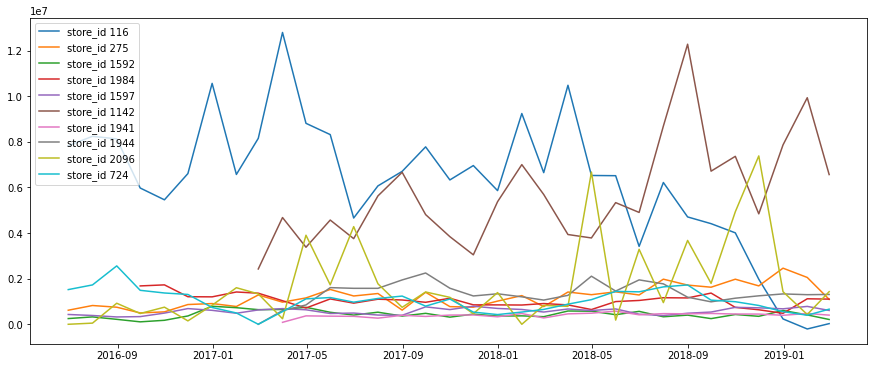

In [94]:
random.seed(1208)

plt.figure(figsize=(15, 6))

for i in make_random(10):

    plt.plot(month_df[month_df.store_id == i].index,
             month_df[month_df.store_id == i].amount,
             label='store_id {}'.format(i))
    
plt.legend()

# Store ID 1142Ïùò Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù

## Store ID 1142 Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂úÌïòÍ∏∞

In [95]:
data_1142 = month_df[month_df.store_id==1142]

In [96]:
data_1142_amount = data_1142[['amount']]

data_1142_etc = data_1142[['real_tot_day', 'real_business_day',
                           'num_of_pay', 'num_of_revisit',
                           'installment_term']]

In [97]:
min_amount = int(data_1142_amount['amount'].min())
max_amount = int(data_1142_amount['amount'].max())

print('amount ÏµúÏÜåÍ∞í : {}'.format(min_amount))
print('amount ÏµúÎåÄÍ∞í : {}'.format(max_amount))

amount ÏµúÏÜåÍ∞í : 2424571
amount ÏµúÎåÄÍ∞í : 12276285


(1424571.0, 13276285.0)

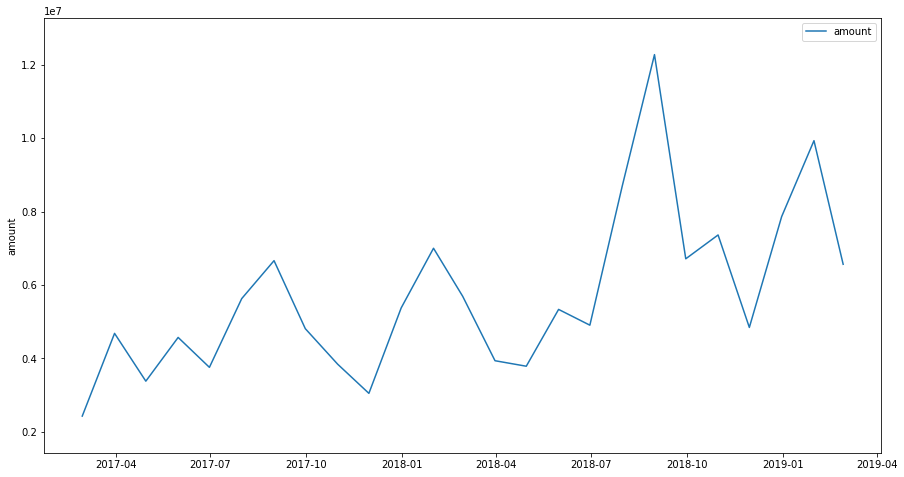

In [98]:
fig = plt.figure(figsize=(15, 8))
amount_fig = sns.lineplot(data=data_1142_amount, x=data_1142_amount.index, y='amount', label='amount')
plt.ylim(min_amount-1000000, max_amount+1000000)

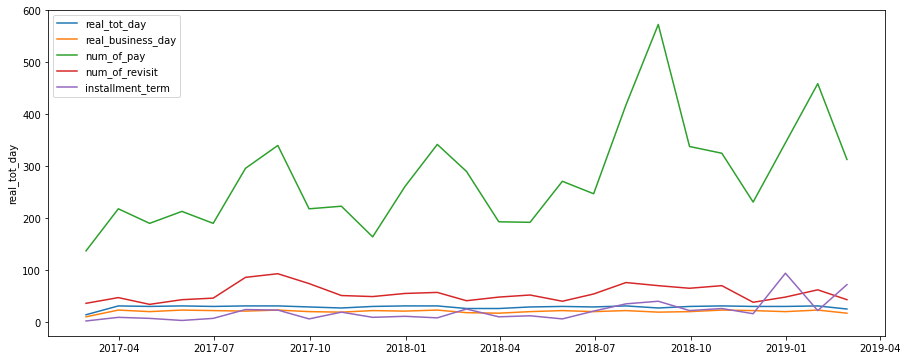

In [99]:
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(1,1,1)

for col in data_1142_etc.columns:

  sns.lineplot(data=data_1142_etc, x=data_1142_etc.index, y=col, label=col)

## Store ID 1142 'Amount' Ï†ïÏÉÅÏÑ± ÌôïÏù∏ÌïòÍ∏∞

### ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Ìå®ÌÑ¥ (ÌèâÍ∑†ÌöåÍ∑Ä Î∞è Î≥ÄÎèôÌè≠ Îì±) ÌååÏïÖ

#### ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞

Ï∂îÏÑ∏ÏÑ±Ïù¥ ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ (Ï£ºÍ¥ÄÏ†Å)

In [100]:
data_1142_amount['Mean'] = data_1142_amount['amount'].mean()

(1424571.0, 13276285.0)

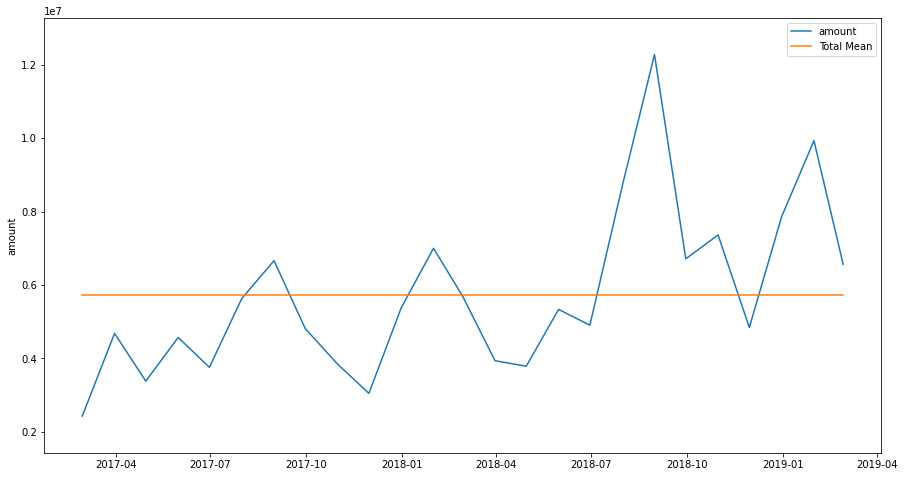

In [101]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(data=data_1142_amount, x=data_1142_amount.index, y='amount', label='amount')
sns.lineplot(data=data_1142_amount, x=data_1142_amount.index, y='Mean', label='Total Mean')
plt.ylim(min_amount-1000000, max_amount+1000000)

#### 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞

Ï∂îÏÑ∏ÏÑ±Ïù¥ ÏóÜÏñ¥ÏßÑ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ (Ï£ºÍ¥ÄÏ†Å)

In [102]:
difference = list(data_1142_amount['amount'])[:1] + np.diff(list(data_1142_amount['amount'])).tolist()

In [103]:
data_1142_amount['Difference'] = difference
data_1142_amount['Difference Mean'] = data_1142_amount['Difference'].mean()

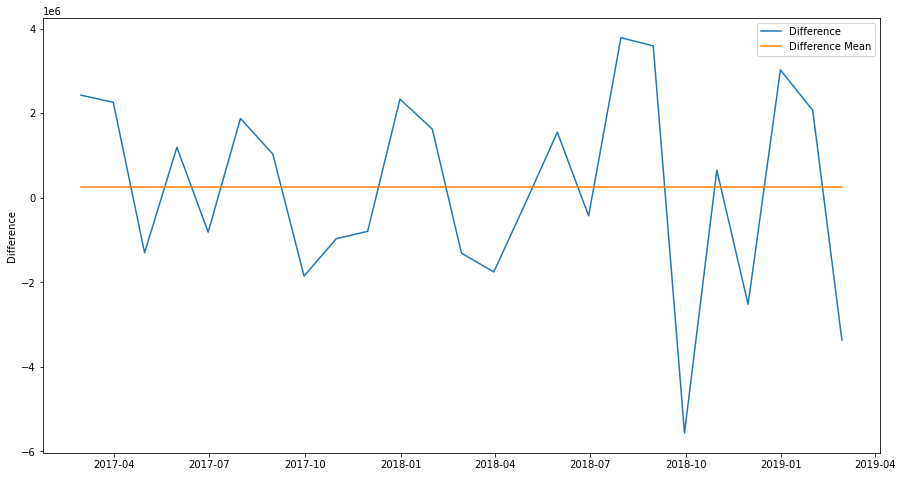

In [104]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(data=data_1142_amount, x=data_1142_amount.index, y='Difference', label='Difference')
sns.lineplot(data=data_1142_amount, x=data_1142_amount.index, y='Difference Mean', label='Difference Mean')

### ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥

* Observed : ÏõêÎ≥∏
* Trend : Ï∂îÏÑ∏ ÏöîÏù∏
* Seasonality : Í≥ÑÏ†à ÏöîÏù∏
* Cycle / Resdiual : ÏàúÌôò ÏöîÏù∏ / Î∂àÍ∑úÏπô

#### ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞

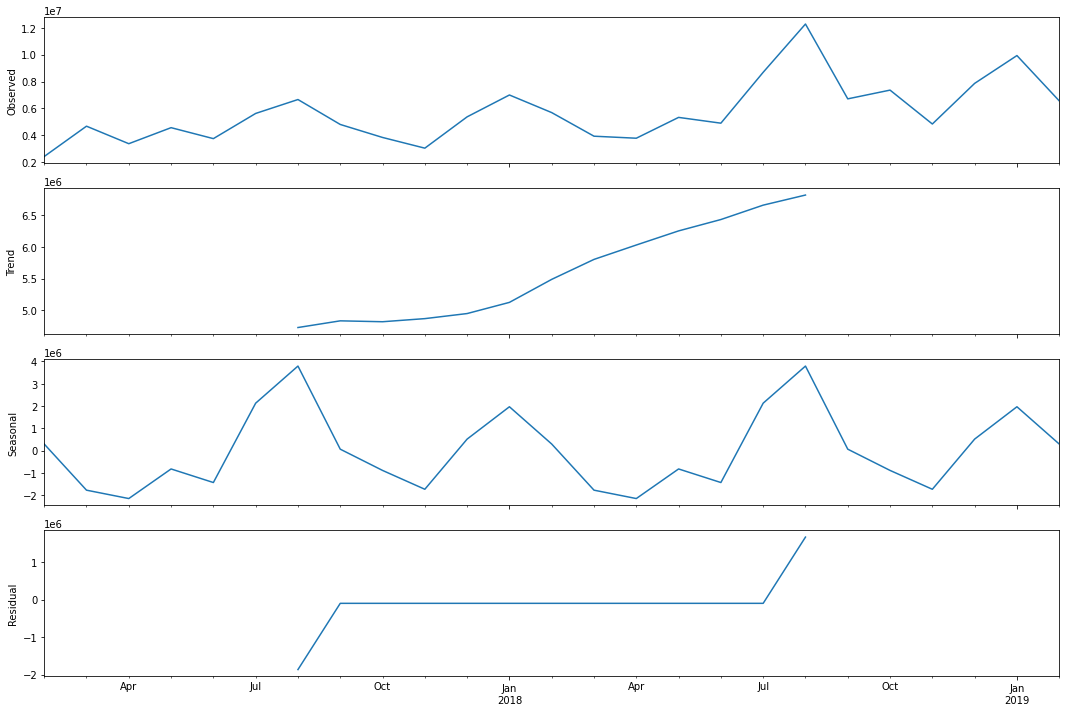

In [105]:
rcParams['figure.figsize']=15,10

model_series = tsa.seasonal_decompose(data_1142_amount['amount'], model='additive')

# Î™®Îç∏ ÏãúÍ∞ÅÌôî
fig = model_series.plot()

#### 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞

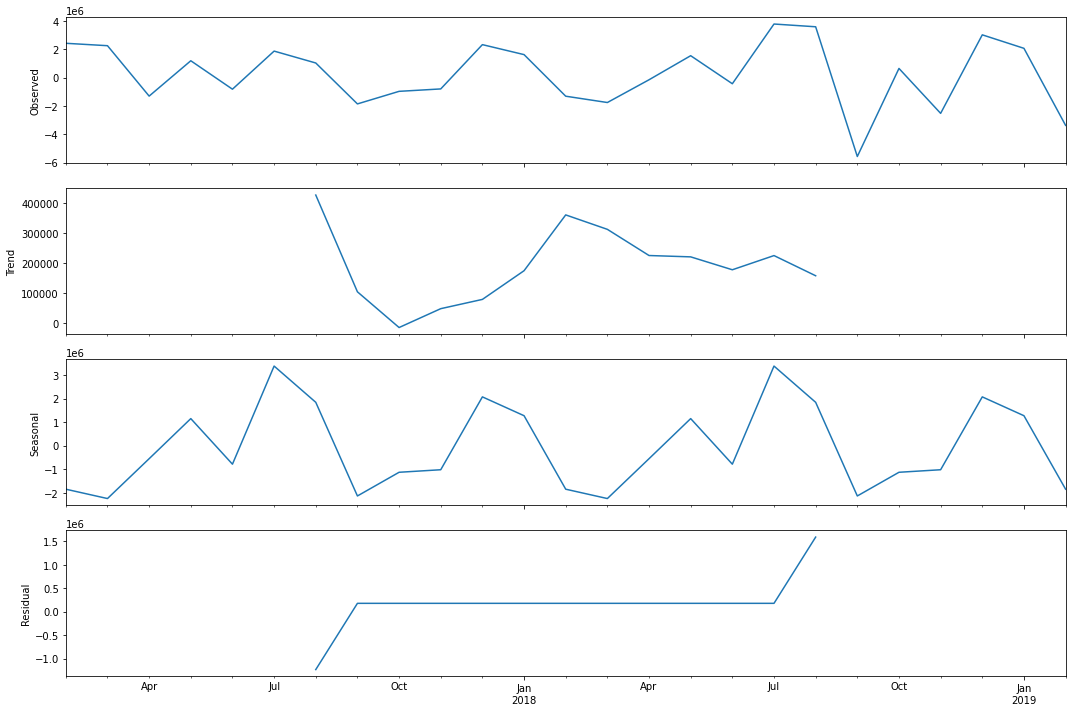

In [106]:
rcParams['figure.figsize']=15,10

model_series = tsa.seasonal_decompose(data_1142_amount['Difference'], model='additive')

# Î™®Îç∏ ÏãúÍ∞ÅÌôî
fig = model_series.plot()

### ACF & PACF Í∑∏ÎûòÌîÑ ÌôïÏù∏

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÏÉÅÏÑ± Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ÉÏúºÎ°ú ÌåêÎ≥Ñ

#### ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞

Text(0.5, 1.0, 'PACF')

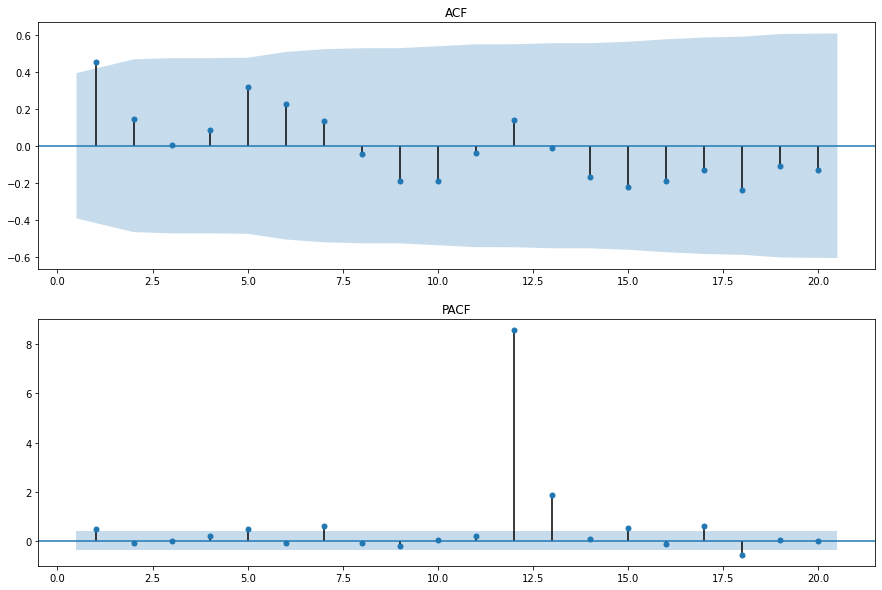

In [107]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(data_1142_amount['amount'], lags = 20, zero = False, ax=ax1)
ax1.set_title("ACF")

sgt.plot_pacf(data_1142_amount['amount'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF")

#### 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞

Text(0.5, 1.0, 'PACF')

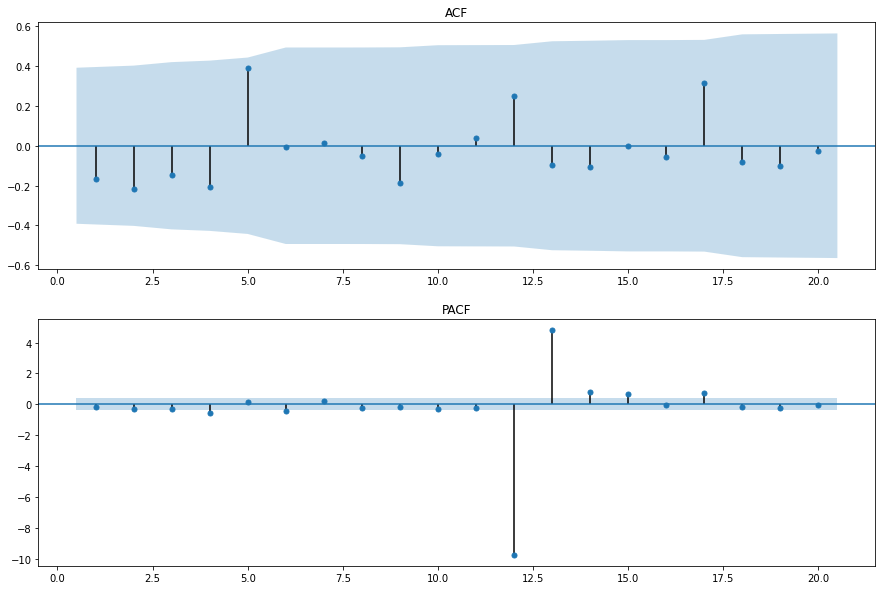

In [108]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(data_1142_amount['Difference'], lags = 20, zero = False, ax=ax1)
ax1.set_title("ACF")

sgt.plot_pacf(data_1142_amount['Difference'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF")

### Îã®ÏúÑÍ∑º Í≤ÄÏ†ï

* p-value > 0.05 : Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù -> ÎπÑÏ†ïÏÉÅÏÑ±
* p-value < 0.05 : ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù -> Ï†ïÏÉÅÏÑ±

In [109]:
def ADF(data):
 
    result = adfuller(data, autolag="AIC")
 
    print("---- Adfuller ----")
    print()
    print('ADF Statistic: %f' % result[0])
    print()
    print('p-value: %1.10f' % result[1])
    print()
    print('Lag: %d' % result[2])
    print()
    print('observation: %d' % result[3])
    print()
    print('Critical Values:')
    print()
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

#### ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞

In [110]:
ADF(data_1142_amount['amount'])

---- Adfuller ----

ADF Statistic: -3.030226

p-value: 0.0321665153

Lag: 0

observation: 24

Critical Values:

	1%: -3.738
	5%: -2.992
	10%: -2.636


#### 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞

In [111]:
ADF(data_1142_amount['Difference'])

---- Adfuller ----

ADF Statistic: -2.942687

p-value: 0.0406045114

Lag: 5

observation: 19

Critical Values:

	1%: -3.833
	5%: -3.031
	10%: -2.656


# Î™®Îç∏ÎßÅ

## ÏãúÍ≥ÑÏó¥ Î™®Îç∏

### Simple Moving Average


* Îã®ÏàúÏù¥ÎèôÌèâÍ∑†ÏùÄ ÌäπÏ†ï Í∏∞Í∞Ñ ÎèôÏïàÏùò dataÎ•º Îã®Ïàú ÌèâÍ∑†ÌïòÏó¨ Í≥ÑÏÇ∞ÌïúÎã§. Îî∞ÎùºÏÑú Í∑∏ Í∏∞Í∞Ñ ÎèôÏïàÏùò dataÎ•º ÎåÄÌëúÌïòÎäî Í∞íÏù¥ Ïù¥ÎèôÌèâÍ∑† ÏïàÏóêÎäî Í∑∏ ÎèôÏïàÏùò data ÏõÄÏßÅÏûÑÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÎã§.
* Ïù¥ÎèôÌèâÍ∑†Ïùò ÌäπÏßïÏù∏ ÏßÄÏó∞(lag)Ïù¥ Î∞úÏÉùÌïòÎ©∞ ÏàòÌïôÏ†ÅÏúºÎ°ú n/2 ÏãúÍ∞Ñ ÎßåÌÅºÏùò ÏßÄÏó∞Ïù¥ Î∞úÏÉùÌïúÎã§.
* Îã®ÏàúÏù¥ÎèôÌèâÍ∑†ÏùÄ Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏöîÎèÑÎ•º ÎèôÏùºÌïòÎã§Í≥† Í∞ÑÏ£ºÌïúÎã§.

In [112]:
def make_sma_arr(window_num):

  ma_arr = np.array([])

  for i in month_df.store_id.unique():

    df_set = month_df[month_df.store_id == i]
    ma_arr = np.concatenate((ma_arr,
                             df_set.amount.rolling(window=window_num).mean().values))
    
  return ma_arr

In [113]:
sma_month = month_df.copy()

sma_month.insert(7, 'amount_2ma', make_sma_arr(2))
sma_month.insert(8, 'amount_3ma', make_sma_arr(3))
sma_month.insert(9, 'amount_6ma', make_sma_arr(6))

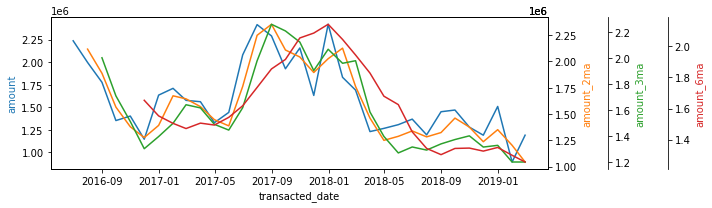

In [114]:
plot_model_graph(sma_month, 1124,
                  'transacted_date',
                  ['amount', 'amount_2ma', 'amount_3ma', 'amount_6ma'])

In [115]:
print("2 winodw SMA MAE Score : ", mae(sma_month.amount_2ma.fillna(0), sma_month.amount.values))
print("3 window SMA MAE Score : ", mae(sma_month.amount_3ma.fillna(0), sma_month.amount.values))
print("6 window SMA MAE Score : ", mae(sma_month.amount_6ma.fillna(0), sma_month.amount.values))

2 winodw SMA MAE Score :  180687.25906004856
3 window SMA MAE Score :  251607.4552831229
6 window SMA MAE Score :  387465.0993765708


### Exponential Moving Average


ÏßÄÏàòÏù¥ÎèôÌèâÍ∑†ÏùÄ Í∞ÄÏ§ëÏù¥ÎèôÌèâÍ∑† Ï§ëÏùò ÌïòÎÇòÎ°ú Îã®ÏàúÏù¥ÎèôÌèâÍ∑†Î≥¥Îã§ ÏµúÍ∑ºÏùò Îç∞Ïù¥ÌÑ∞Ïóê ÎÜíÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Î∞©Î≤ï

In [116]:
def make_ewm_arr(data_frame, span_num):

    arr_ewm = np.array([])

    for i in data_frame.store_id.unique():

        df_set = data_frame[data_frame.store_id == i]

        # pandasÏóê ÎÇ¥Ïû•Îêú ewm Ìå®ÌÇ§ÏßÄÎ•º Ïù¥Ïö©ÌïòÎ©¥ ÏßÄÏàòÏù¥ÎèôÌèâÍ∑†ÏùÑ ÏâΩÍ≤å Ïù¥Ïö©Ìï† Ïàò ÏûàÏùå
        # ÎßàÏßÄÎßâÏóê .mean()ÏùÑ Ìï¥Ï§òÏïº ÌèâÍ∑†Í∞íÏù¥ ÏõîÎ≥ÑÎ°ú Í∞ÅÍ∞Å Ïûò Í≥ÑÏÇ∞Îê®
        arr_ewm = np.concatenate((arr_ewm, df_set.amount.ewm(span=span_num).mean().values))
    
    return arr_ewm

In [117]:
ewm_month = month_df.copy()

ewm_month.insert(7, 'amount_3ewm', make_ewm_arr(month_df, 3))
ewm_month.insert(8, 'amount_6ewm', make_ewm_arr(month_df, 6))

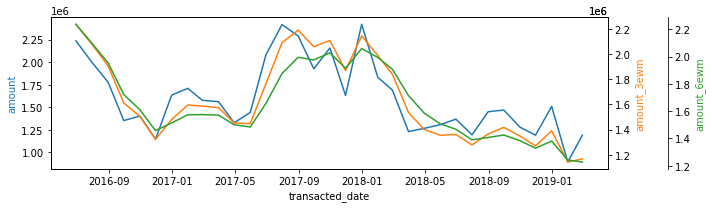

In [118]:
plot_model_graph(ewm_month, 1124, 'transacted_date', ['amount', 'amount_3ewm', 'amount_6ewm'])

### ARMA

In [119]:
size = int(len(data_1142_amount) * 0.7)
train = data_1142_amount[:size]
test = data_1142_amount[size:]

In [120]:
set_arma = sm.tsa.ARMA(train.amount, (2, 2))
set_result = set_arma.fit()

set_output = set_result.forecast(len(test))
set_pred = set_output[0]

Mean value of store_id 1124 : 5721228.571428572
MAE Score of test : 3571068.069237132


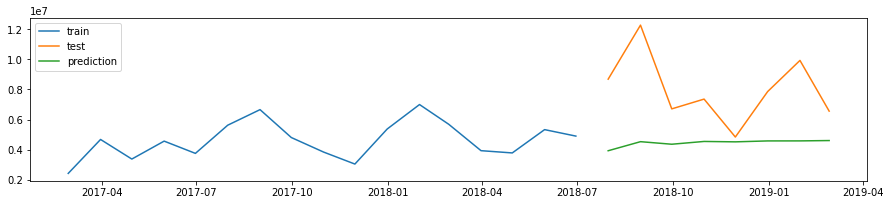

In [121]:
print("Mean value of store_id 1124 :", data_1142_amount.amount.mean())
print("MAE Score of test :", mae(test.amount, set_pred))

plot_train_test_pred_graph(train, test, set_pred)

### ARIMA

In [122]:
p = list(range(0, 6))
d = [0, 1, 2]
q = list(range(0, 6))

pdq = list(itertools.product(p, d, q))

In [123]:
size = int(len(data_1142_amount) * 0.7)
train = data_1142_amount[:size]
test = data_1142_amount[size:]

In [124]:
best_score = 9000000
best_param = 0

for param in tqdm(pdq):

    try:

        arima_model = ARIMA(train.amount.values, order=param)
        result = arima_model.fit()

        if result.aic < best_score:
            best_score = result.aic
            best_param = param

    except:
        continue

  0%|          | 0/108 [00:00<?, ?it/s]

In [125]:
set_arima = ARIMA(data_1142_amount.amount.values, order=best_param)
set_result = set_arima.fit()
set_pred = set_result.forecast(len(test))[0]

Mean value of store_id 1124 : 5721228.571428572
AIC Score of test : 477.51791233570157
Best parameter of (p, d, q):  (0, 2, 1)
MAE Score of test : 9974145.051704463


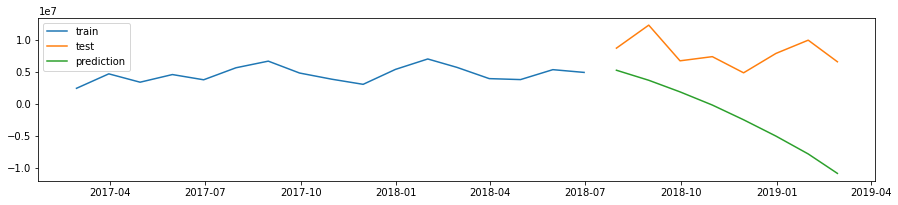

In [126]:
print("Mean value of store_id 1124 :", data_1142_amount.amount.mean())
print("AIC Score of test :", best_score)
print("Best parameter of (p, d, q): ",best_param)
print("MAE Score of test :", mae(test.amount, set_pred))

plot_train_test_pred_graph(train, test, set_pred)

## Exponential Smoothing (ÏßÄÏàòÌèâÌôúÎ≤ï)

* Simple Exponential Smoothing
* Holt's Exponential Smoothing
* Holt-Winter's Exponential Smoothing

### Simple Exponential Smoothing

* trendÎÇò seasonality Î∞òÏòÅÏùÑ ÌïòÏßÄ Î™ªÌï®
* level Ï†ïÎèÑÎßå ÏàòÌèâÏÑ†ÏúºÎ°ú ÎÇòÏò¥

In [127]:
df_set = month_df[month_df.store_id == 1124]

size = int(len(df_set) * 0.7)
train = df_set[:size]
test = df_set[size:]

In [128]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
ses_model = SimpleExpSmoothing(train.amount)

# Î™®Îç∏ ÌïôÏäµ
ses_result = ses_model.fit()

# Î™®Îç∏ ÏòàÏ∏°
ses_pred = ses_result.forecast(len(test))

In [129]:
print("store_id 1124 mean value : ", df_set.amount.mean())
print("MAE Score of test :", mae(test.amount, ses_pred))

store_id 1124 mean value :  1605876.1904761903
MAE Score of test : 135783.78195289886


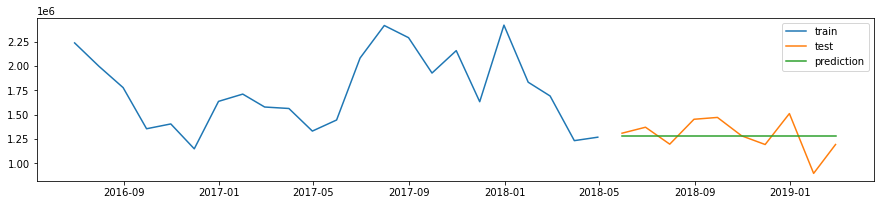

In [130]:
plot_train_test_pred_graph(train, test, ses_pred)

### Holt's Exponential Smoothing

* trendÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥ Simple Exponential SmoothingÏóêÏÑú ÌôïÏû•Ìïú Í≤ÉÏù¥Îã§.
* ÏòàÏ∏°ÏùÑ ÏúÑÌïú Ïãù Ïô∏Ïóê level smoothingÏùÑ ÏúÑÌïú ÏãùÍ≥º trend smoothingÏùÑ ÏúÑÌïú ÏãùÏù¥ Ìè¨Ìï®ÎêúÎã§
* ÏÉùÏÑ±Îêú ÏòàÏ∏°ÏùÄ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê ÏòàÏ∏° Î≤îÏúÑÍ∞Ä Î©ÄÏñ¥Ïßà ÏàòÎ°ù over-forecast ÎêòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.

In [131]:
df_set = month_df[month_df.store_id == 1124]

size = int(len(df_set) * 0.7)
train = df_set[:size]
test = df_set[size:]

holt_model = Holt(np.array(train.amount))
holt_result = holt_model.fit()
holt_pred = holt_result.forecast(len(test))

In [132]:
print("Mean value of store_id 1124 : ", df_set.amount.mean())
print("MAE Score of test :", mae(test.amount, holt_pred))

Mean value of store_id 1124 :  1605876.1904761903
MAE Score of test : 135663.6557101411


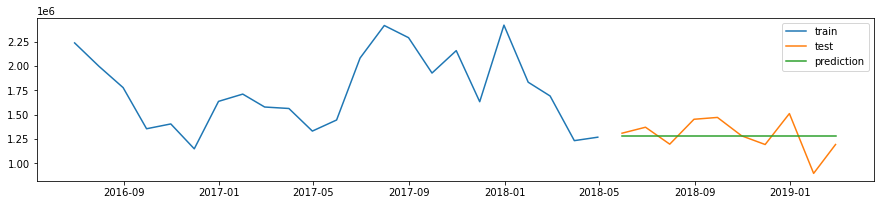

In [133]:
plot_train_test_pred_graph(train, test, holt_pred)

### Holt-Winter's Exponential Smoothing

* Holt-Winter's Î∞©Î≤ïÏùÄ seasonalityÎ•º Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï¥ Holt's Î∞©Î≤ïÏóêÏÑú ÌôïÏû•Îêú Í≤ÉÏù¥Îã§.
* Holt-Winter's Î∞©Î≤ïÏùÄ ÏòàÏ∏°ÏãùÍ≥º 3Í∞úÏùò smoothing ÏãùÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎã§.
  * levelÏóê ÎåÄÌïú Ïãù  ùëôùë° 
  * trendÏóê ÎåÄÌïú Ïãù  ùëè‚àíùë° 
  * seasonalÏóê ÎåÄÌïú ÏöîÏÜå  ùë†ùë° 
  * smoothing parameterÏóê Ìï¥ÎãπÌïòÎäî  ùõº ,  ùõΩ‚àó ,  ùõæ 
  * seasonalityÏùò ÎπàÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Í∏∞ ÏúÑÌïú  ùëö 
* seasonalÏù¥ Î≥ÄÌôîÌïòÎäî ÌòïÌÉúÏóê Îî∞Îùº Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏù¥ ÏûàÎã§.
  * additive : seasonalÏùò Î≥ÄÌôîÍ∞Ä ÏùºÏ†ïÌïòÍ≤å ÏßÄÏÜçÎê† Îïå
  * multiplicative : seasonalÏùò Î≥ÄÌôîÍ∞Ä levelÏóê ÎπÑÎ°ÄÏ†ÅÏùº Îïå

In [134]:
df_set = month_df[month_df.store_id == 1124]

size = int(len(df_set) * 0.7)
train = df_set[:size]
test = df_set[size:]

In [135]:
# ÏµúÏ†ÅÍ∞íÏùÑ Ï∞æÍ∏∞ ÏúÑÌïú Í∏∞Ï§Ä
es_score = 1000000000
best_period = 0

# Í∞Å store_id ÏµúÏ†ÅÏùò seasonal periodÎ•º Ï∞æÍ∏∞ ÏúÑÌïú ÌÉêÏÉâ
for p in range(2,(len(train)//2) + 1):

    try:
        # ExponentialSmoothing Ìå®ÌÇ§ÏßÄÏóêÏÑú trendÏôÄ seasonalÏùÑ Î™®Îëê addÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ Ï∂îÏÑ∏Î≥ÄÎèô Í≥ÑÏ†àÎ≥ÄÎèôÏùÑ Î™®Îëê Í≥†Î†§ÌïòÍ≤å Îê®
        es_model = ExponentialSmoothing(np.array(train.amount), seasonal_periods=p, trend='add', seasonal='add')
        es_result = es_model.fit()
        es_pred = es_result.forecast(len(test))
        
        # Ï∂îÏ†ï Í≤∞Í≥ºÎ•º Í≤ÄÏ†ïÌïú maeÍ∞íÏù¥ Í∏∞Ï§ÄÍ∞í(ÌòπÏùÄ Ïù¥Ï†Ñ ÏµúÏ†ÅÍ∞í)Î≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞ Ïù¥Î•º Í≥ÑÏÜç ÏóÖÎç∞Ïù¥Ìä∏
        if es_score > mae(test.amount, es_pred):
            es_score = mae(test.amount, es_pred)
            best_period = p

    except:
        continue

In [136]:
print("Mean value of store_id 0 :", df_set.amount.mean())
print("MAE Score of test :", es_score)
print("Best seasonal period :", best_period)

Mean value of store_id 0 : 1605876.1904761903
MAE Score of test : 157797.12356943142
Best seasonal period : 2


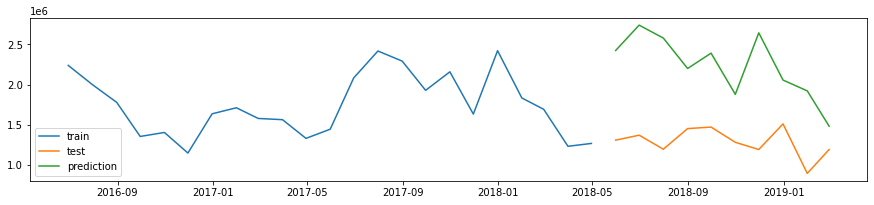

In [137]:
plot_train_test_pred_graph(train, test, es_pred)

## ÌöåÍ∑Ä Î™®Îç∏

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [138]:
df_month_reg = month_df.copy()

df_month_reg.insert(1, 'year',df_month_reg.index.year)
df_month_reg.insert(2, 'month',df_month_reg.index.month)

df_month_reg.reset_index(drop=True, inplace=True)
df_month_reg = df_month_reg[df_month_reg.store_id==1124]

In [139]:
size = int(len(df_month_reg) * 0.7)
train = df_month_reg[:size]
test = df_month_reg[size:]

### Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [140]:
reg_models = [LinearRegression(),
              Ridge(),
              Lasso(),
              ElasticNet(),
              GradientBoostingRegressor(),
              SVR(),
              XGBRegressor()]

reg_model_names = ["LinearRegression",
                    "Ridge",
                    "Lasso",
                    "ElasticNet",
                    "GradientBoositng",
                    "SupportVector",
                    "XGBoost"]

### ÌÖåÏä§Ìä∏

In [141]:
# Í∞Å columns values ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† ÏïåÍ≥†Î¶¨Ï¶òÎì§Ïùò score ÌôïÏù∏
def predict_columns(data_frame, x_cols, y_col):

    size = int(len(data_frame) * 0.7)
    train = data_frame[:size]
    test = data_frame[size:]

    Regression_Model = {'Model':reg_model_names,
                        'MAE':[]}

    for i in tqdm(range(len(reg_models))):

        reg = reg_models[i].fit(train[x_cols], train[y_col])
        pred = reg_models[i].predict(test[x_cols])

        print('{}Ïùò MSE : {}'.format(reg_model_names[i], mae(test[y_col], pred.astype(int))))
        plot_train_test_pred_graph(train, test, pred)

        Regression_Model['MAE'].append(mae(test[y_col], pred.astype(int)))

    Regression_Model = pd.DataFrame(Regression_Model).sort_values(by='MAE', ascending=True)

    return Regression_Model

  0%|          | 0/7 [00:00<?, ?it/s]

LinearRegressionÏùò MSE : 228327.1


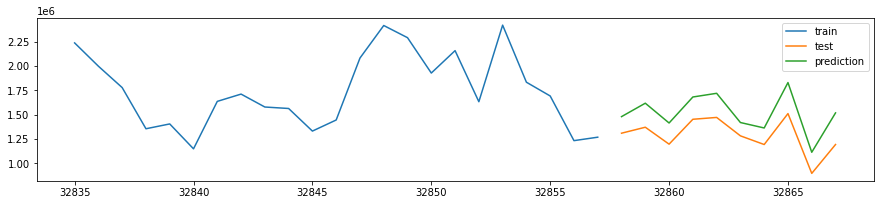

RidgeÏùò MSE : 172652.6


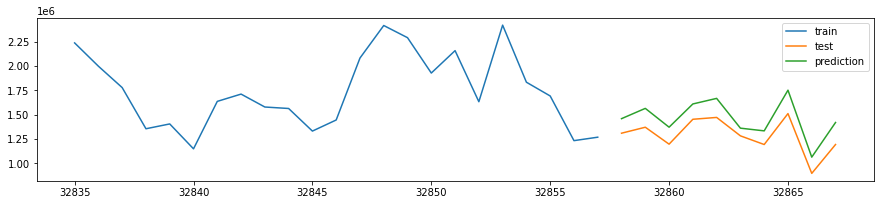

LassoÏùò MSE : 228318.7


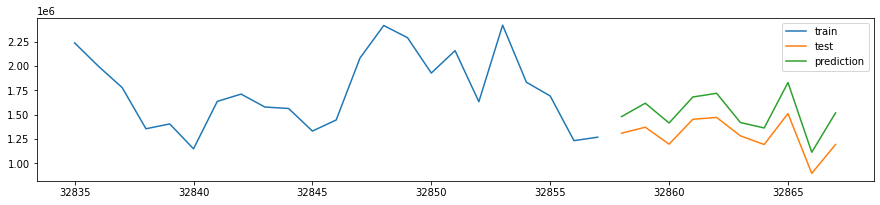

ElasticNetÏùò MSE : 58219.82857142859


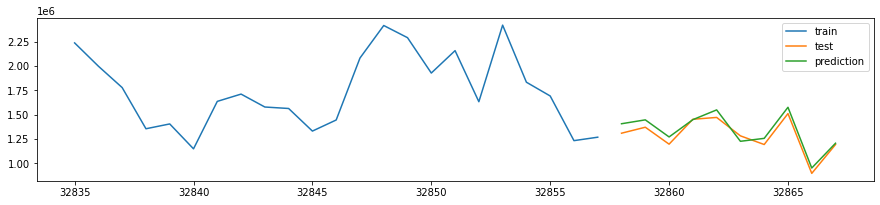

GradientBoositngÏùò MSE : 89568.91428571427


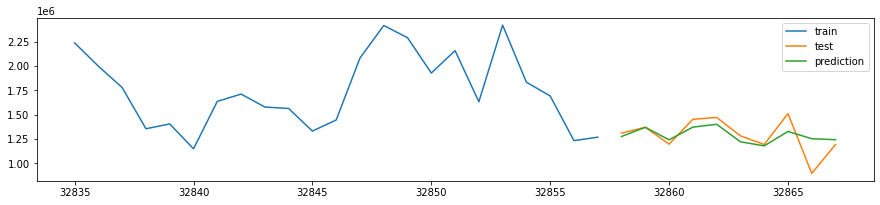

SupportVectorÏùò MSE : 404875.0


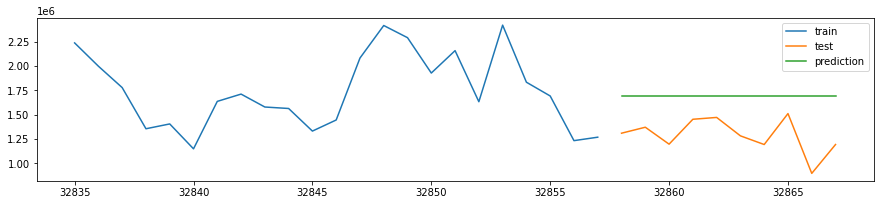

[08:04:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoostÏùò MSE : 78899.47142857146


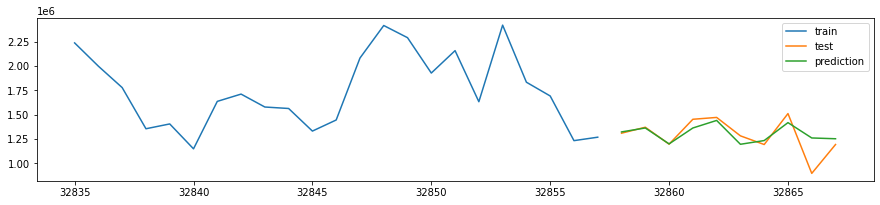

In [142]:
df_Regression_Model = predict_columns(df_month_reg,
                                      ['year', 'month', 'real_tot_day', 'real_business_day',
                                       'num_of_pay', 'num_of_revisit', 'installment_term'],
                                       'amount')

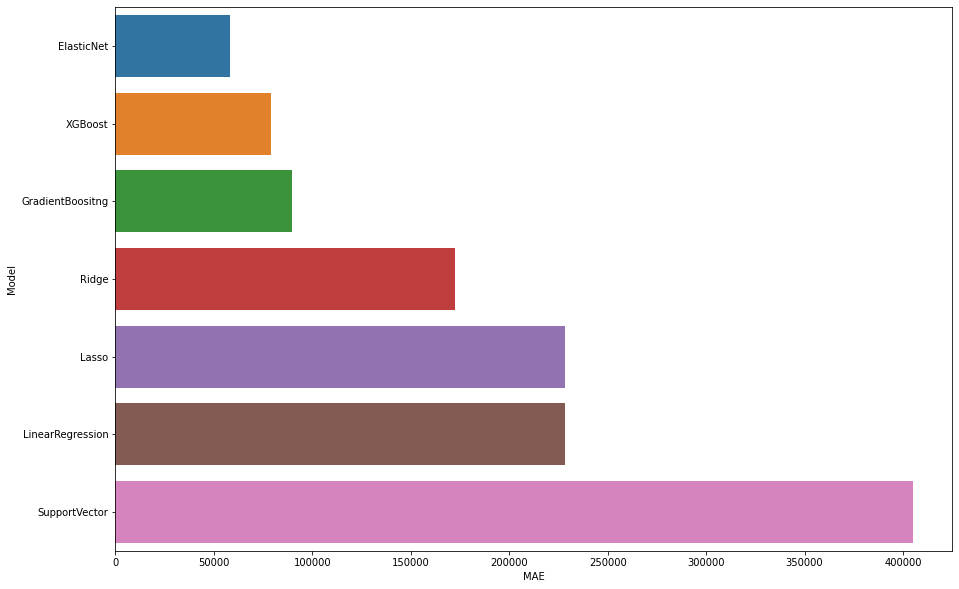

In [143]:
sns.barplot(data=df_Regression_Model, x='MAE', y='Model')

## Îî•Îü¨Îãù

### LSTM

#### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [144]:
df_month_dl = month_df.copy()

normalized_arr = np.array([])

for i in tqdm(df_month_dl.store_id.unique()):

    df_set = df_month_dl[df_month_dl.store_id == i].amount.values
    set_arr = np.array([(float(i + 1) / float(df_set[0] + 1))-1 for i in df_set])
    normalized_arr = np.concatenate((normalized_arr, set_arr))

df_month_dl.insert(7, 'normalize', normalized_arr)

  0%|          | 0/1967 [00:00<?, ?it/s]

In [145]:
df_set = df_month_dl[df_month_dl.store_id == 1124]

dl_x = df_set.index.values
dl_y = df_set.normalize

In [146]:
size = int(len(df_set) * 0.7)

x_train = dl_x[:size]
y_train = dl_y[:size]
x_test = dl_x[size:]
y_test = dl_y[size:]

In [147]:
x_train = x_train.reshape(len(x_train), 1)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

x_test = x_test.reshape(len(x_test), 1)
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [148]:
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

#### Î™®Îç∏ ÏÉùÏÑ±ÌïòÍ∏∞

In [149]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50))

model.add(Dropout(0.2))

# Adding the output layer

model.add(Dense(units = 1))


#### Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞

In [150]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [151]:
model.fit(x_train, y_train, epochs=100, validation_split=0.05, verbose=0)

#### Î™®Îç∏ ÏòàÏ∏°ÌïòÍ∏∞

In [152]:
lstm_pred = model.predict(x_test)

df_lstm_test = pd.DataFrame([((df_set.amount[0] + 1) * (i + 1) - 1) for i in y_test.values], columns=['amount'], index=y_test.index)
df_lstm_pred = pd.DataFrame([((df_set.amount[0] + 1) * (i + 1) - 1)[0] for i in lstm_pred], columns=['amount'])

#### Í≤∞Í≥º

Mean value of store_id 1124 : 1605876.1904761903
MAE score of test : 507785.7481694311


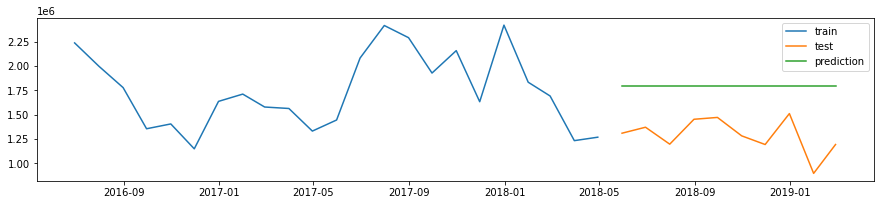

In [153]:
print("Mean value of store_id 1124 :", df_set.amount.mean())
print("MAE score of test :", mae(df_lstm_test, df_lstm_pred))

plot_train_test_pred_graph(df_set[:size], df_lstm_test, df_lstm_pred)